In [11]:
import numpy as np
import pandas as pd
from plotnine import *

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score

from sklearn.datasets import make_classification

from sklearn.preprocessing import StandardScaler 

## Analiza segmentów na zbiorze Auta

In [12]:
df = pd.read_csv('auta.csv', index_col= 0)

In [13]:
print(df.shape)
print(df.head())

(53, 5)
             Cena  Przebieg  Pojemnosc   KM  diesle
Audi A3   20900.0  164450.0     1896.0  110    66.9
Audi A4   25311.4  182000.0     1900.0  130    75.7
Audi A6   31500.0  185000.0     2496.0  170    82.5
Audi A8  109000.0  129380.0     4134.0  300    68.1
Audi Q7  179000.0   72000.0     3000.0  240    89.1


In [14]:
z = StandardScaler()
auta = df.copy()
auta[auta.columns] = z.fit_transform(df[df.columns])
auta_cols = auta.columns

In [15]:
print(auta_cols)

Index(['Cena', 'Przebieg', 'Pojemnosc', 'KM', 'diesle'], dtype='object')


In [16]:
auta.head()

,Cena,Przebieg,Pojemnosc,KM,diesle
Audi A3,-0.198580,0.484563,-0.017676,-0.248784,0.040064
Audi A4,-0.055174,0.944320,-0.009643,0.202004,0.458097
Audi A6,0.146007,1.022911,1.187258,1.103579,0.781122
Audi A8,2.665391,-0.434164,4.476727,4.033697,0.097069
Audi Q7,4.940965,-1.937346,2.199402,2.681335,1.094646


# Grupowanie metodą k-means

In [7]:
ks = range(2, 20)
inercje = []

for k in ks:
    km = KMeans(n_clusters=k).fit(auta[auta_cols])
    inercje.append(km.inertia_)

inercje_df = pd.DataFrame({'K':ks, 'Inercja' : inercje})

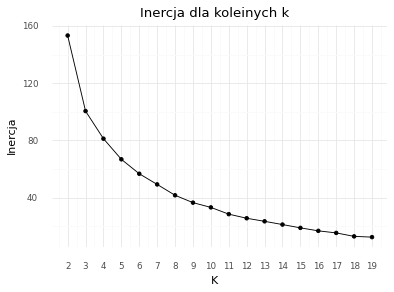

<ggplot: (98304045038)>

In [8]:
(ggplot(inercje_df, aes(x='K', y='Inercja'))+
 geom_point()+geom_line() +
 scale_x_continuous(breaks = ks)+
 theme_minimal()+
 labs(title = 'Inercja dla koleinych k'))

In [9]:
ks = range(2, 20)
sylwetki = []

for k in ks:
    km = KMeans(n_clusters=k).fit(auta[auta_cols])
    sylwetki.append(silhouette_score(auta[auta_cols], km.predict(auta[auta_cols])))
    
sylwetki_df = pd.DataFrame({'K': ks, 'Sylwetki' : sylwetki})

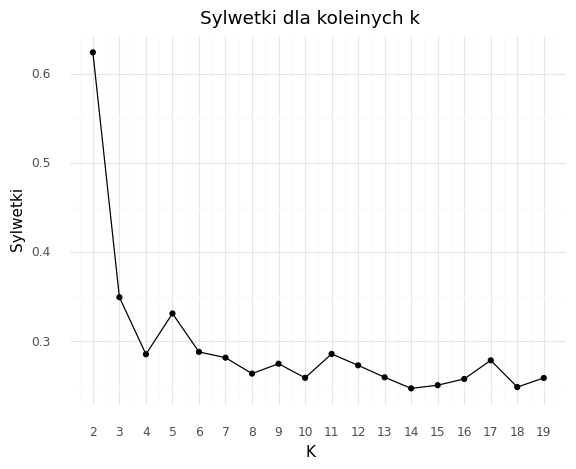

<ggplot: (140964697335)>

In [10]:
(ggplot(sylwetki_df, aes(x='K', y='Sylwetki'))+
 geom_point()+geom_line() +
 scale_x_continuous(breaks = ks)+
 theme_minimal()+
 labs(title = 'Sylwetki dla koleinych k'))

Biorąc pod uwagę indeks sylwetki oraz inercje najlepszą ilością grup wydają się 2 i 5. Ze względu na ilość kolumn branych pod uwagę indeksy sylwetki przy każdym odpaleniu różnią się od siebie.

# Interpretacja wyników

## Segmentacja

### n_clusters = 2

In [11]:
km = KMeans(n_clusters = 2).fit(auta[auta_cols])

auta['klastry'] = km.labels_

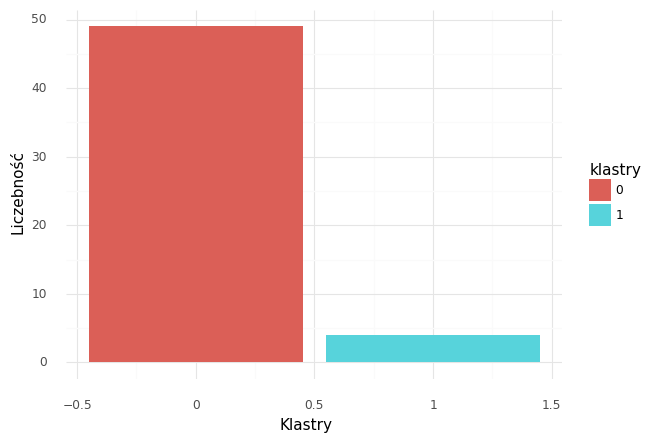

<ggplot: (140964716659)>

In [12]:
(ggplot(auta, aes(x = 'klastry', fill = 'factor(klastry)')) +
 geom_bar()+
 theme_minimal()+
 labs(x = 'Klastry', y = 'Liczebność',fill = 'klastry'))

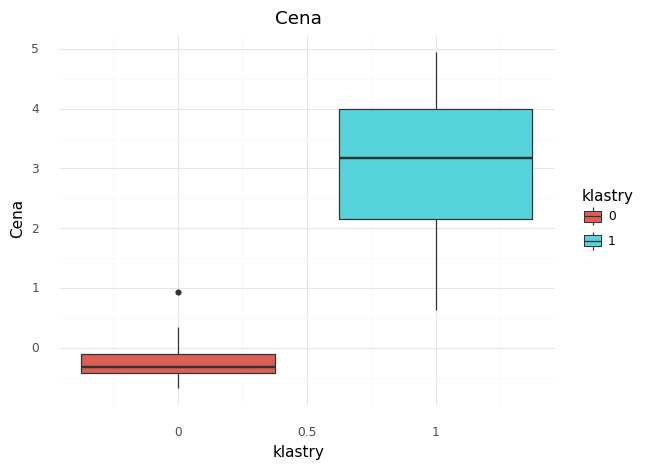

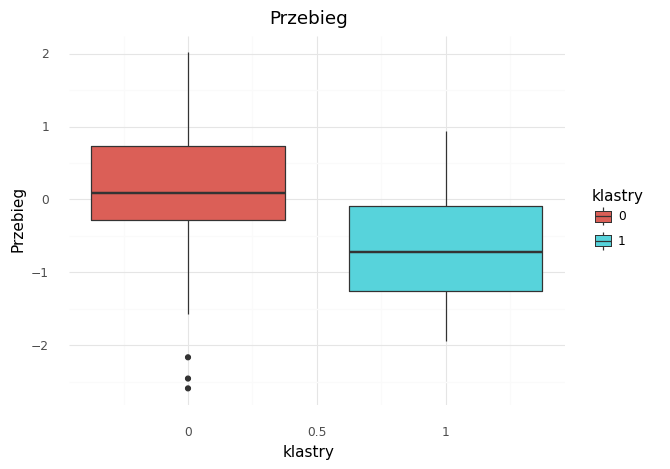

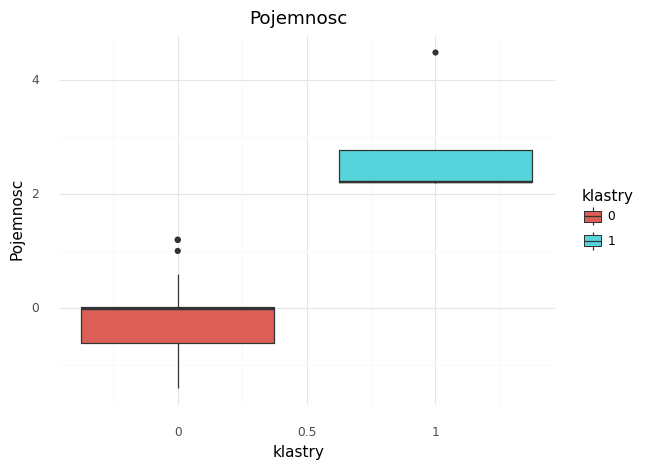

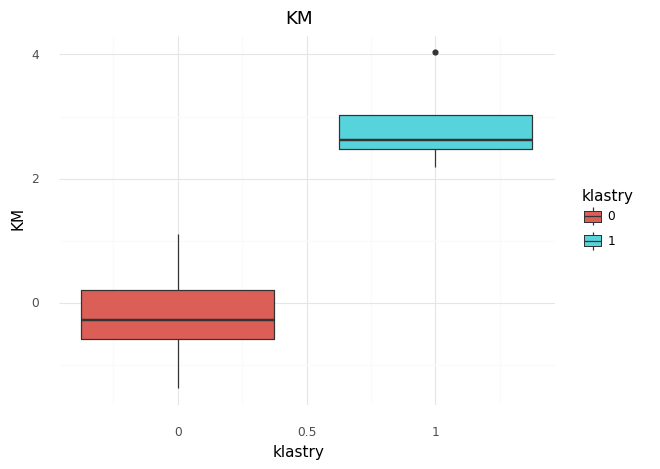

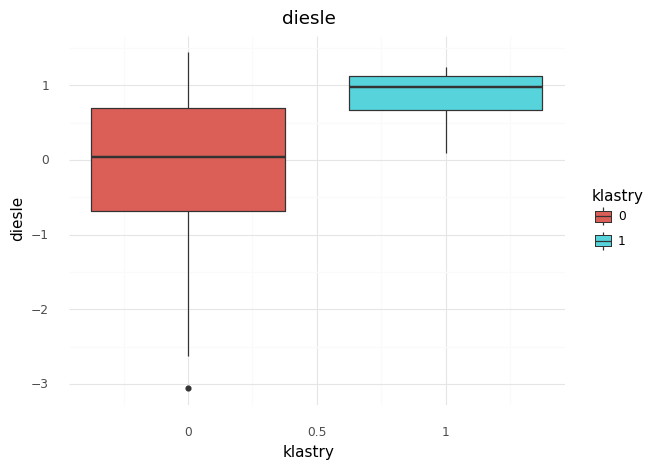

In [13]:
for zm in auta_cols:
    print((ggplot(auta, aes(x = 'klastry', y = zm, fill = 'factor(klastry)'))+
      geom_boxplot()+
      theme_minimal()+
      labs(title = zm, x = 'klastry',fill = 'klastry')))

### Dla n_clusters = 2
*grupa0* czarakteryzuje się wysokim przebiegiem, niską ceną, niską pojemność i niska liczba KM

*grupa1* czarakteryzuje się niskim przebiegiem, wysoką ceną, wysoką pojemność i liczba KM

### n_clusters = 5

In [14]:
km = KMeans(n_clusters = 5).fit(auta[auta_cols])

auta['klastry'] = km.labels_

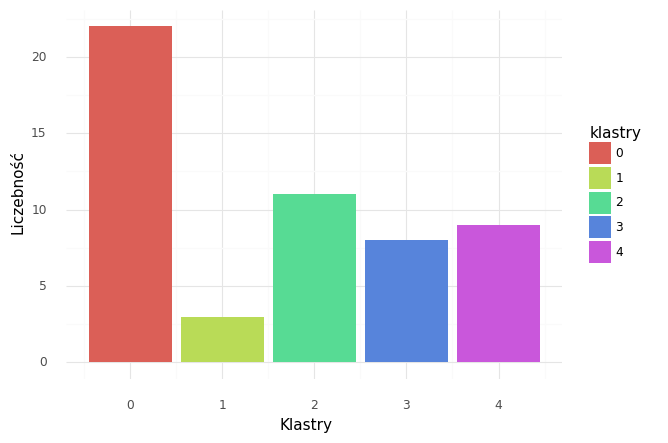

<ggplot: (140964658800)>

In [15]:
(ggplot(auta, aes(x = 'klastry', fill = 'factor(klastry)')) +
 geom_bar()+
 theme_minimal()+
 labs(x = 'Klastry', y = 'Liczebność', fill = 'klastry'))

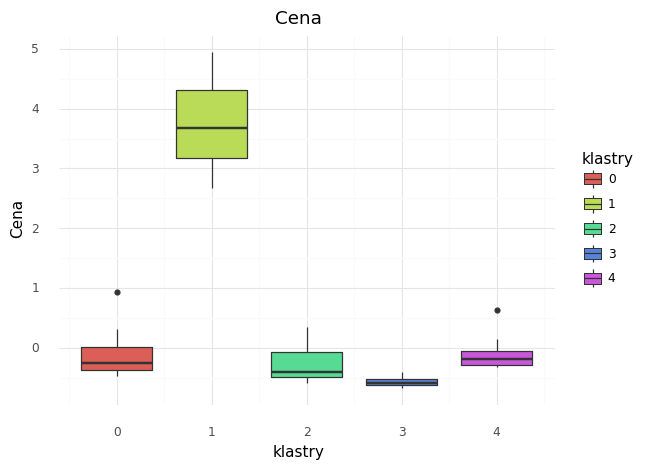

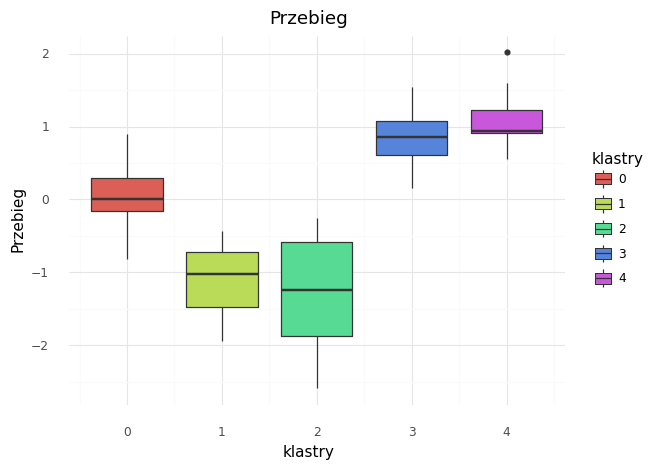

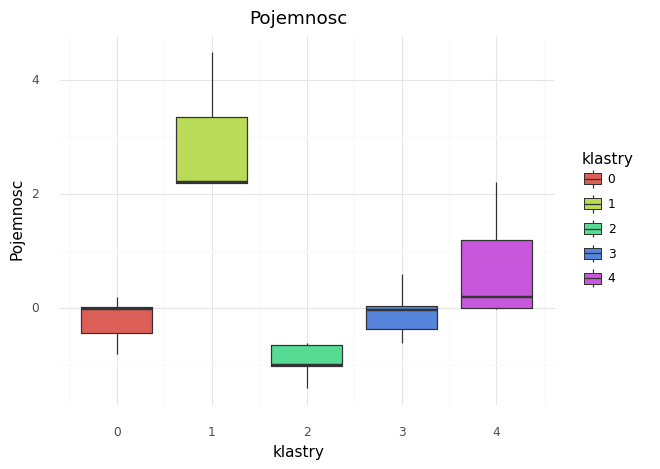

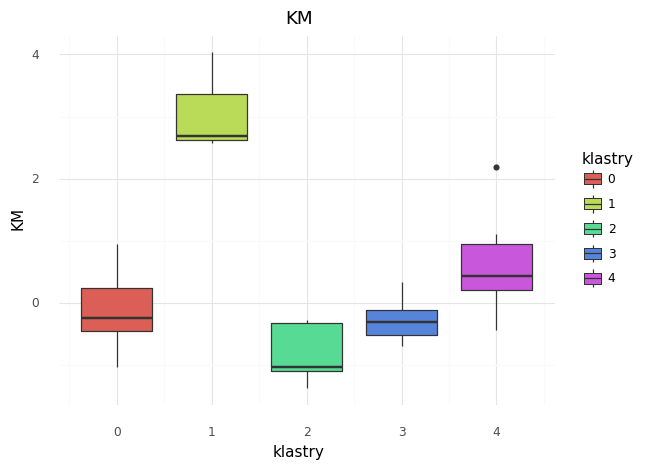

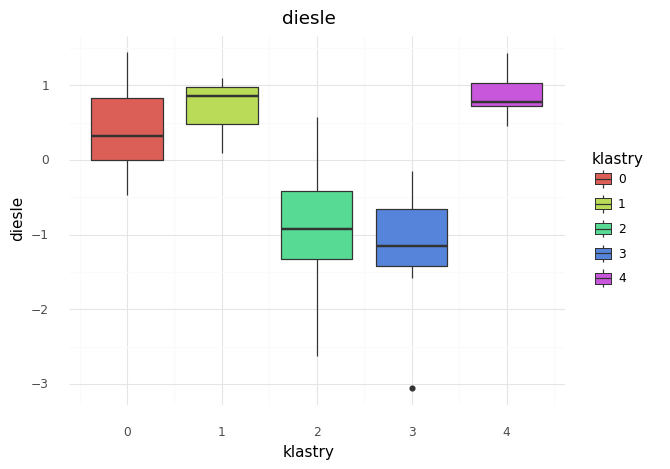

In [16]:
for zm in auta_cols:
    print((ggplot(auta, aes(x = 'klastry', y = zm, fill = 'factor(klastry)'))+
      geom_boxplot()+
      theme_minimal()+
      labs(title = zm, x = 'klastry', fill = 'klastry')))

### Dla n_clusters = 5
*grupa0* charakteryzuje się niską ceną, średnim przebiegiem, niską pojemnością i niską liczbą KM

*grupa1* charakteryzuje się najwyższą ceną, niskim przebiegiem, największą pojemnością i liczbą KM

*grupa2* charakteryzuje się niską ceną, niskim przebiegiem, najniższą pojemnością i najniższą liczbą KM

*grupa3* charakteryzuje się najniższą ceną, wysokim przebiegiem, niską pojemnością i niską liczbą KM

*grupa4* charakteryzuje się niską ceną, najwyższym przebiegiem, średnią pojemnością i liczbą KM

# Grupowanie za pomocą GMM 

### n_components = 2

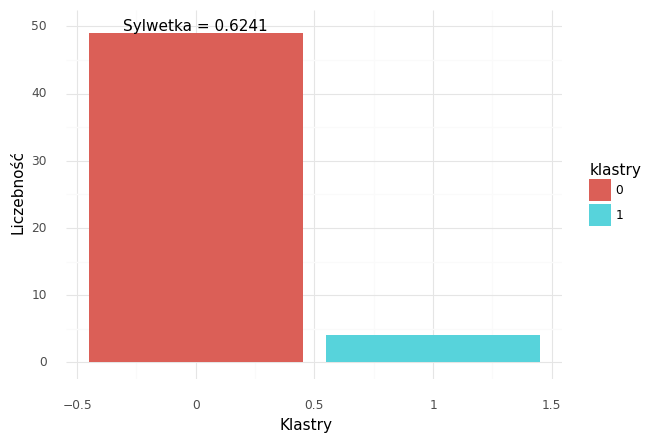

<ggplot: (140966599714)>

In [17]:
gm = GaussianMixture(n_components=2).fit(auta[auta_cols])

auta['klastry_gm'] = gm.predict(auta[auta_cols])
sylwetka_gm = round(silhouette_score(auta[auta_cols], gm.predict(auta[auta_cols])),4)

(ggplot(auta, aes(x = 'klastry_gm', fill = 'factor(klastry_gm)')) +
 geom_bar()+
 annotate('text', x = 0, y = 50, label = f'Sylwetka = {sylwetka_gm}')+
 theme_minimal()+
 labs(x = 'Klastry', y = 'Liczebność',fill = 'klastry'))

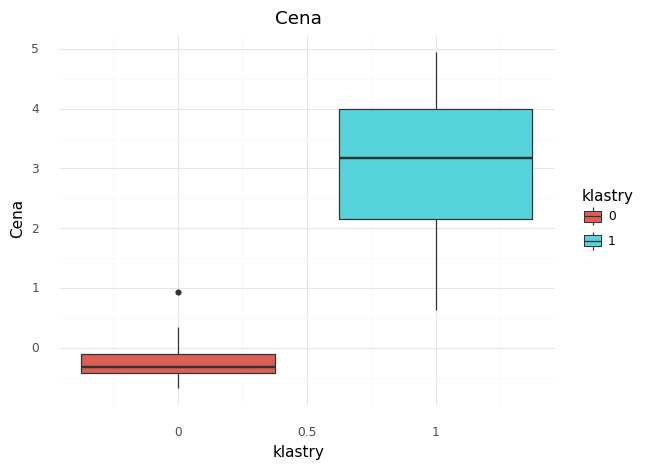

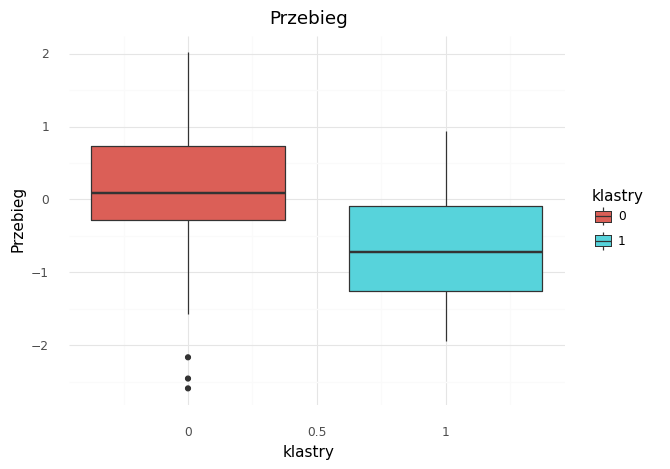

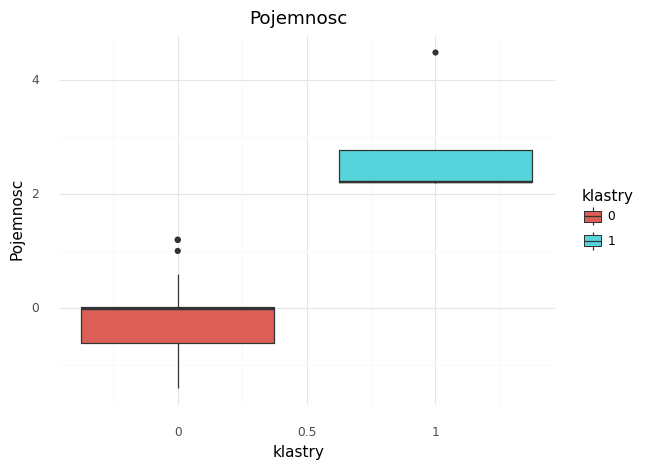

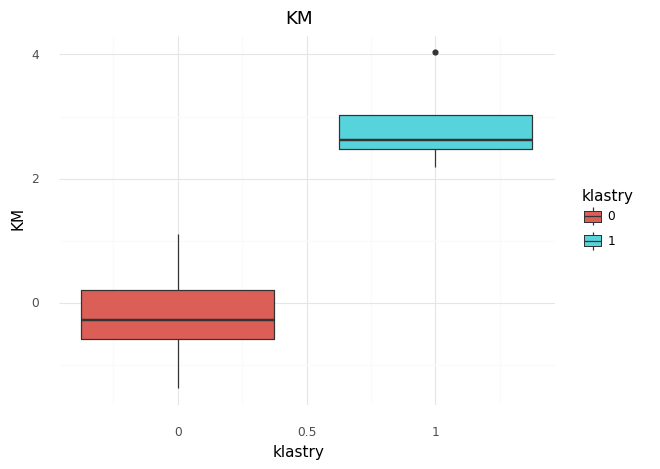

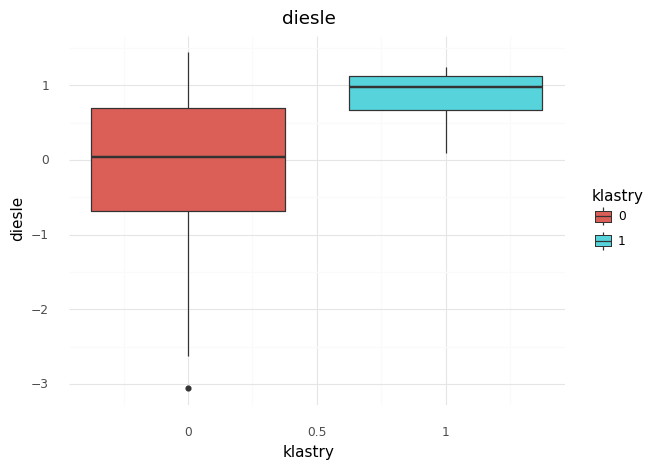

In [18]:
for zm in auta_cols:
    print((ggplot(auta, aes(x = 'klastry_gm', y = zm, fill = 'factor(klastry_gm)'))+
      geom_boxplot()+
      theme_minimal()+
      labs(title = zm, x = 'klastry',fill = 'klastry')))

### Dla n_components = 2
*grupa0* czarakteryzuje się wysokim przebiegiem, niską ceną, niską pojemność i niska liczba KM

*grupa1* czarakteryzuje się niskim przebiegiem, wysoką ceną, wysoką pojemność i liczba KM

### n_components = 5

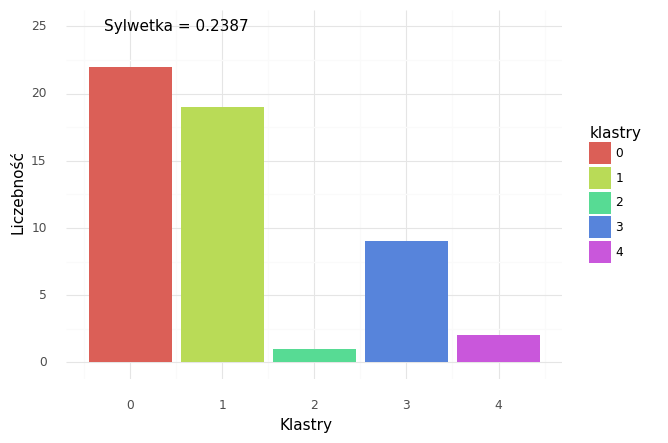

<ggplot: (98304042692)>

In [17]:
gm = GaussianMixture(n_components=5).fit(auta[auta_cols])

auta['klastry_gm'] = gm.predict(auta[auta_cols])
sylwetka_gm = round(silhouette_score(auta[auta_cols], gm.predict(auta[auta_cols])),4)

(ggplot(auta, aes(x = 'klastry_gm', fill = 'factor(klastry_gm)')) +
 geom_bar()+
 annotate('text', x = 0.5, y = 25, label = f'Sylwetka = {sylwetka_gm}')+
 theme_minimal()+
 labs(x = 'Klastry', y = 'Liczebność',fill = 'klastry'))

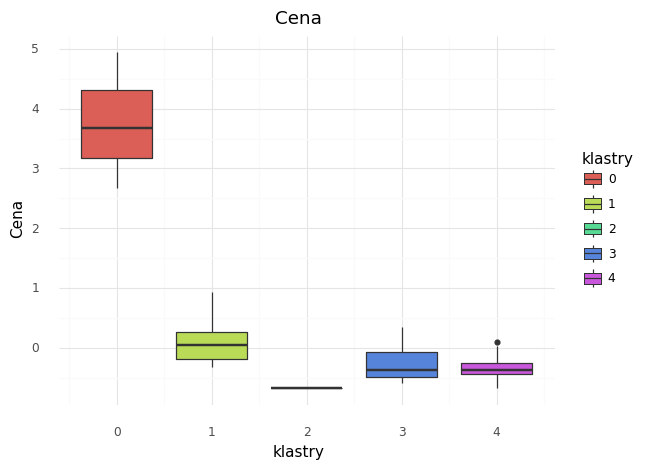

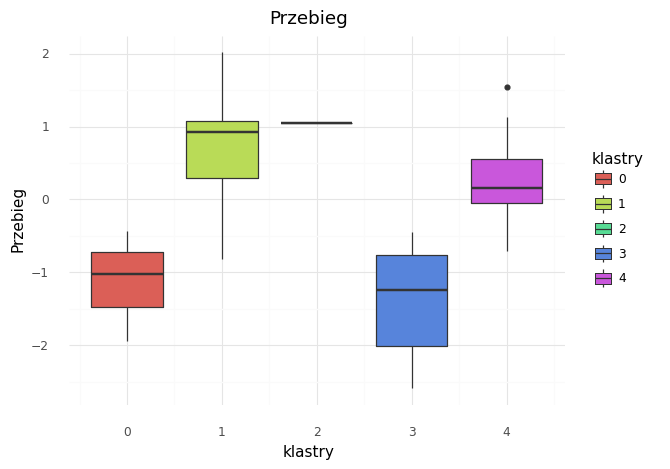

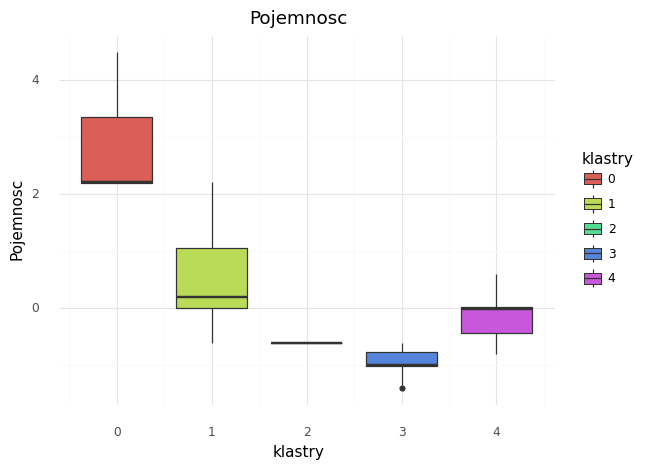

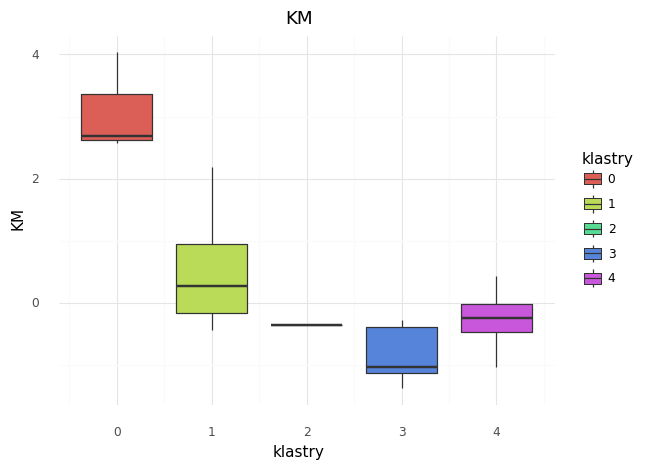

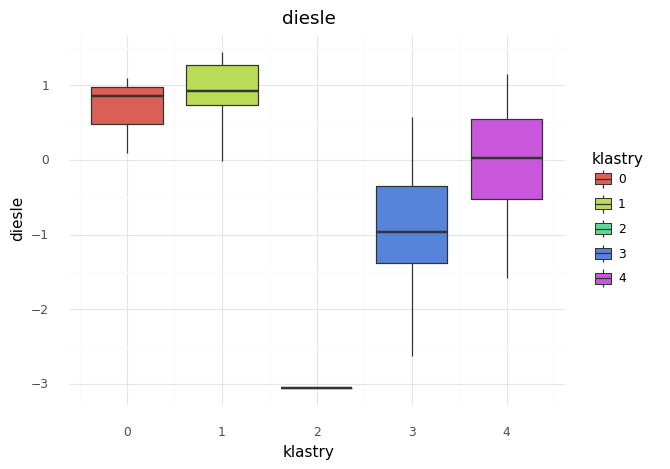

In [23]:
for zm in auta_cols:
    print((ggplot(auta, aes(x = 'klastry_gm', y = zm, fill = 'factor(klastry_gm)'))+
      geom_boxplot()+
      theme_minimal()+
      labs(title = zm, x = 'klastry',fill = 'klastry')))

### Dla n_clusters = 5
*grupa0* charakteryzuje się najwyższą ceną, niskim przebiegiem, największą pojemnością i liczbą KM

*grupa1* charakteryzuje się niską ceną, wysokim przebiegiem, średnią pojemnością i liczbą KM

*grupa2* charakteryzuje się najniższą ceną, wysokim przebiegiem, niską pojemnością i niską liczbą KM

*grupa3* charakteryzuje się niską ceną, niskim przebiegiem, najniższą pojemnością i najniższą liczbą KM

*grupa4* charakteryzuje się niską ceną, średnim przebiegiem, niską pojemnością i liczbą KM

# Grupowanie za pomocą DBSCAN

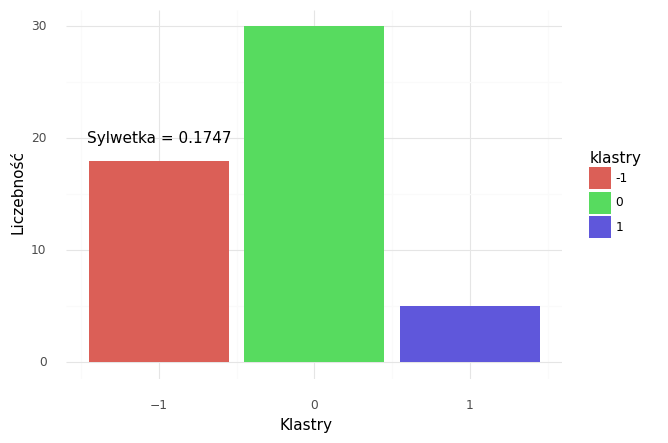

<ggplot: (140965371639)>

In [21]:
db = DBSCAN(eps = 0.8, min_samples = 4).fit(auta[auta_cols])
auta['klastry_db'] = db.labels_
sylwetka_db = round(silhouette_score(auta[auta_cols],  db.labels_),4)

(ggplot(auta, aes(x = 'klastry_db', fill = 'factor(klastry_db)')) +
 geom_bar()+
 annotate('text', x = -1, y = 20, label = f'Sylwetka = {sylwetka_db}') +
 theme_minimal()+
 labs(x = 'Klastry', y = 'Liczebność',fill = 'klastry'))

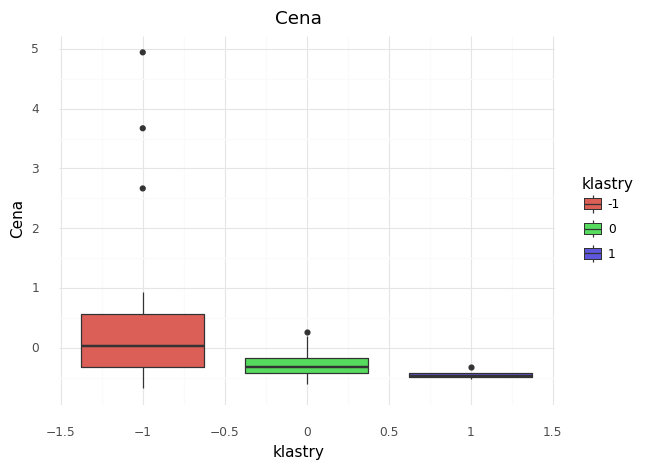

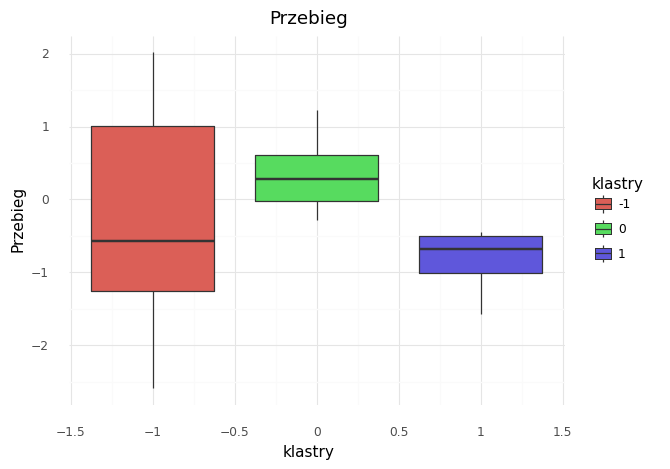

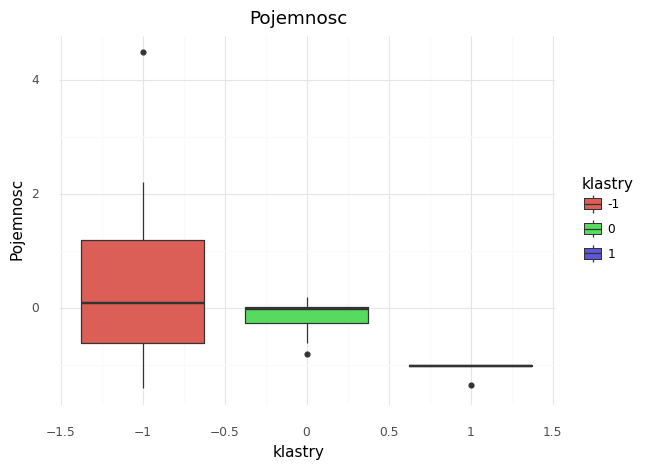

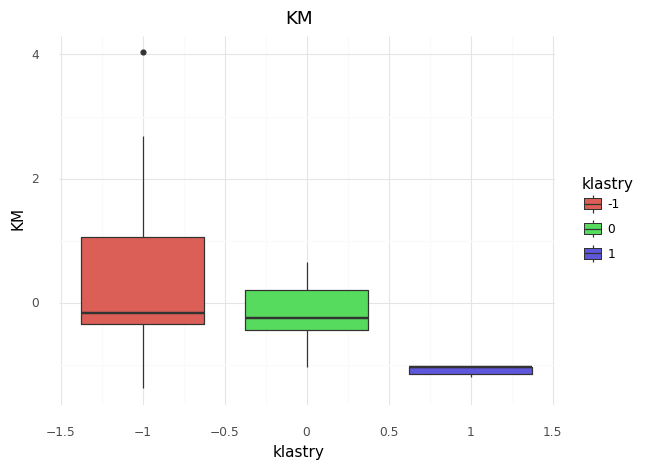

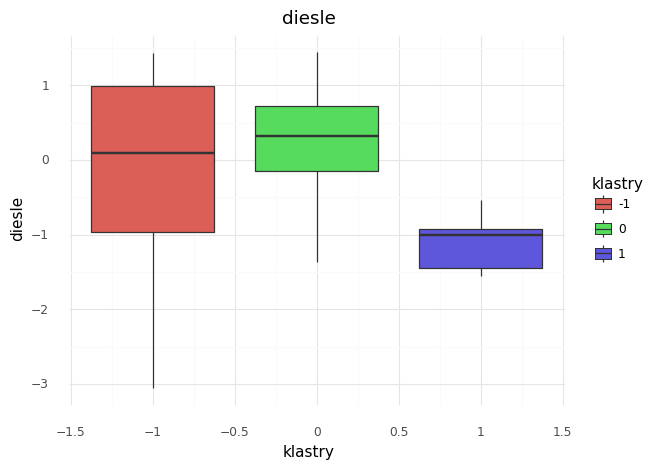

In [22]:
for zm in auta_cols:
    print((ggplot(auta, aes(x = 'klastry_db', y = zm, fill = 'factor(klastry_db)'))+
      geom_boxplot()+
      theme_minimal()+
      labs(title = zm, x = 'klastry',fill = 'klastry')))

*grupa -1* zawiera próbki oddalone od grup 0 i 1 znalazły się w śród nich przede wszystkim najdroższe z aut

*grupa0* czarakteryzuje się niską ceną, wysokim przebiegiem, średnią pojemnością i liczbą KM

*grupa1* czarakteryzuje się niską ceną, niskim przebiegiem, niską pojemnością i liczbą KM